IN THIS SECTION WE WILL TRY TO EXPLORE RELATIONSHIPS BETWEEN DIFFERENT VARIABLES, WILL TRY TO FIND THE OUTLIERS ETC.

In [104]:
import pandas as pd
df=pd.read_csv('cleansed_merc.csv')

In [105]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,30.1,4.0
...,...,...,...,...,...,...,...,...
12855,C Class,2020,35999,Automatic,500,Diesel,55.4,2.0
12856,B Class,2020,24699,Automatic,2500,Diesel,55.4,2.0
12857,GLC Class,2019,30999,Automatic,11612,Diesel,41.5,2.1
12858,CLS Class,2019,37990,Automatic,2426,Diesel,45.6,2.0


CHECKING THE DISTRIBUTION OF DATA

HERE WE CAN SEE THAT THE "OTHER" CATEGORIES IN TRANSMISSON AND FUELTYPE IS LESS THAN 1% SO WE CAN DELETE IT

In [106]:
df['transmission'].value_counts()

Semi-Auto    6641
Automatic    4797
Manual       1420
Other           2
Name: transmission, dtype: int64

In [107]:
df=df[df['transmission']!='Other']

In [108]:
df['fuelType'].value_counts()

Diesel    9033
Petrol    3649
Hybrid     170
Other        6
Name: fuelType, dtype: int64

In [109]:
df=df[df['fuelType']!='Other']

In [110]:
df.shape

(12852, 8)

BUT IN FUELTYPE THE IMBALANCE IS HUGE WHICH WILL CREATE BIAS IN THE MODEL SO NEED TO TREAT THAT

In [116]:
from sklearn.utils import resample
df_diesel = df[df['fuelType'] == 'Diesel']
df_petrol = df[df['fuelType'] == 'Petrol']
df_hybrid = df[df['fuelType'] == 'Hybrid']
df_hybrid_upsampled = resample(df_hybrid, replace=True, n_samples=2500, random_state=42)
df = pd.concat([df_diesel, df_petrol, df_hybrid_upsampled])

# Shuffle the dataset to randomize the order of samples
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [117]:
df.shape

(15182, 8)

In [118]:
df['fuelType'].value_counts()

Diesel    9033
Petrol    3649
Hybrid    2500
Name: fuelType, dtype: int64

In [119]:
df['year'].value_counts()

2019    4897
2017    2906
2016    2817
2018    1476
2015    1322
2020     669
2014     522
2013     319
2012      57
2010      38
2011      38
2007      22
2009      17
2008      16
2004      13
2001      10
2005       9
2002       9
2006       8
2003       7
1998       4
2000       3
1970       1
1999       1
1997       1
Name: year, dtype: int64

WE WILL DELETE YEARS 1999,1970 AND 1997

In [120]:
df['year']=df['year'].astype(str)

In [121]:
lst=['1970','1999','1997']
df=df[~df['year'].isin(lst)]

In [122]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,E Class,2015,15691,Automatic,29701,Diesel,57.7,2.1
1,E Class,2017,21699,Semi-Auto,31459,Diesel,65.7,2.0
2,C Class,2015,10995,Semi-Auto,58734,Diesel,53.3,2.1
3,S Class,2016,24880,Automatic,75000,Hybrid,42.4,3.5
4,GLA Class,2017,18470,Automatic,24928,Petrol,48.7,1.6
...,...,...,...,...,...,...,...,...
15177,E Class,2017,20498,Automatic,18330,Diesel,72.4,2.0
15178,C Class,2016,16562,Automatic,49126,Hybrid,134.5,2.0
15179,CLS Class,2013,14790,Automatic,58000,Diesel,47.1,3.0
15180,E Class,2014,11250,Automatic,98514,Diesel,51.4,2.1


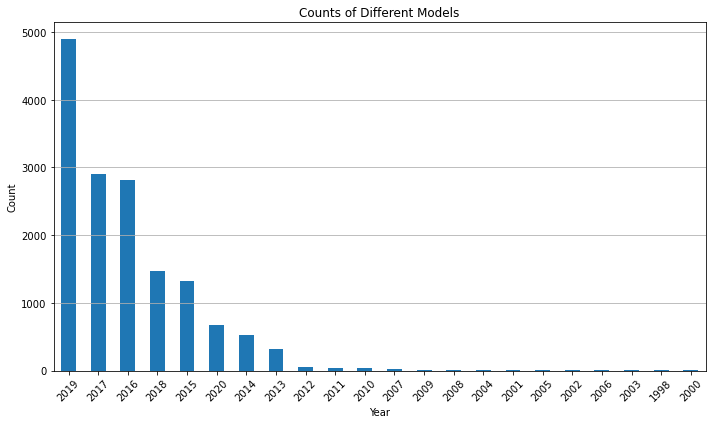

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame


# Count the occurrences of each unique value in the "model" column
model_counts = df['year'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
model_counts.plot(kind='bar')
plt.title('Counts of Different Models')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [124]:
df['model'].unique()

array([' E Class', ' C Class', ' S Class', ' GLA Class', ' B Class',
       ' A Class', ' SL CLASS', ' GLE Class', ' CLS Class', ' GLC Class',
       ' V Class', ' CL Class', ' X-CLASS', ' GL Class', ' CLA Class',
       ' GLB Class', ' M Class', ' GLS Class', ' G Class', ' SLK',
       ' CLC Class', '180', ' CLK', ' R Class', '230', '200', '220'],
      dtype=object)

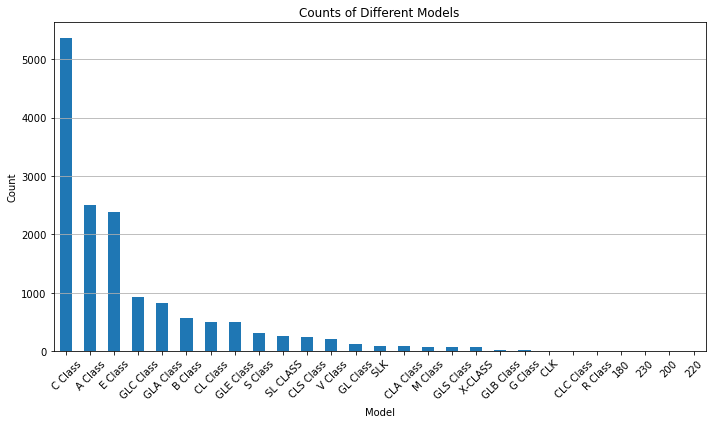

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame


# Count the occurrences of each unique value in the "model" column
model_counts = df['model'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
model_counts.plot(kind='bar')
plt.title('Counts of Different Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [126]:
model_counts = df['model'].value_counts()

In [127]:
model_counts

 C Class      5360
 A Class      2510
 E Class      2382
 GLC Class     935
 GLA Class     826
 B Class       569
 CL Class      508
 GLE Class     502
 S Class       314
 SL CLASS      258
 CLS Class     237
 V Class       203
 GL Class      121
 SLK            94
 CLA Class      86
 M Class        78
 GLS Class      74
 X-CLASS        73
 GLB Class      18
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
200              1
220              1
Name: model, dtype: int64

WE CAN SEE THAT MODEL WITH LESS THAN 10 COUNT WILL NOT PROVIDE ANY SIGNIFICANT IMPACT TO THE MODEL SO WE CAN JUST GROUP IT AND NAME IT AS "OTHER"

In [128]:
models_to_replace = model_counts[model_counts < 10].index

# Replace values in the "model" column with count less than 10 with "Other"
df['model'] = df['model'].replace(models_to_replace, 'Other')


In [129]:
df['model'].value_counts()

 C Class      5360
 A Class      2510
 E Class      2382
 GLC Class     935
 GLA Class     826
 B Class       569
 CL Class      508
 GLE Class     502
 S Class       314
 SL CLASS      258
 CLS Class     237
 V Class       203
 GL Class      121
 SLK            94
 CLA Class      86
 M Class        78
 GLS Class      74
 X-CLASS        73
 GLB Class      18
Other           16
 G Class        15
Name: model, dtype: int64

In [130]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,E Class,2015,15691,Automatic,29701,Diesel,57.7,2.1
1,E Class,2017,21699,Semi-Auto,31459,Diesel,65.7,2.0
2,C Class,2015,10995,Semi-Auto,58734,Diesel,53.3,2.1
3,S Class,2016,24880,Automatic,75000,Hybrid,42.4,3.5
4,GLA Class,2017,18470,Automatic,24928,Petrol,48.7,1.6
...,...,...,...,...,...,...,...,...
15177,E Class,2017,20498,Automatic,18330,Diesel,72.4,2.0
15178,C Class,2016,16562,Automatic,49126,Hybrid,134.5,2.0
15179,CLS Class,2013,14790,Automatic,58000,Diesel,47.1,3.0
15180,E Class,2014,11250,Automatic,98514,Diesel,51.4,2.1


FIND OUT RELATIONSHIPS BETWEEN MY INDEPENDENT VARIABLES AND MY DEPENDNT VARIABLES

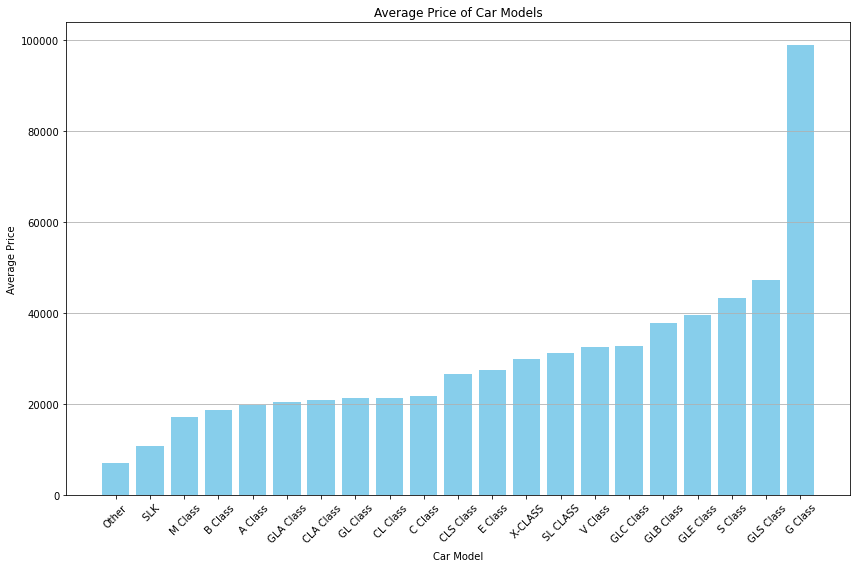

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
average_price_per_model = df.groupby('model')['price'].mean().reset_index()

# Sort the dataframe by average price
average_price_per_model = average_price_per_model.sort_values(by='price')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(average_price_per_model['model'], average_price_per_model['price'], color='skyblue')
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.title('Average Price of Car Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [137]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,E Class,2015,15691,Automatic,29701,Diesel,57.7,2.1
1,E Class,2017,21699,Semi-Auto,31459,Diesel,65.7,2.0
2,C Class,2015,10995,Semi-Auto,58734,Diesel,53.3,2.1
3,S Class,2016,24880,Automatic,75000,Hybrid,42.4,3.5
4,GLA Class,2017,18470,Automatic,24928,Petrol,48.7,1.6
...,...,...,...,...,...,...,...,...
15177,E Class,2017,20498,Automatic,18330,Diesel,72.4,2.0
15178,C Class,2016,16562,Automatic,49126,Hybrid,134.5,2.0
15179,CLS Class,2013,14790,Automatic,58000,Diesel,47.1,3.0
15180,E Class,2014,11250,Automatic,98514,Diesel,51.4,2.1


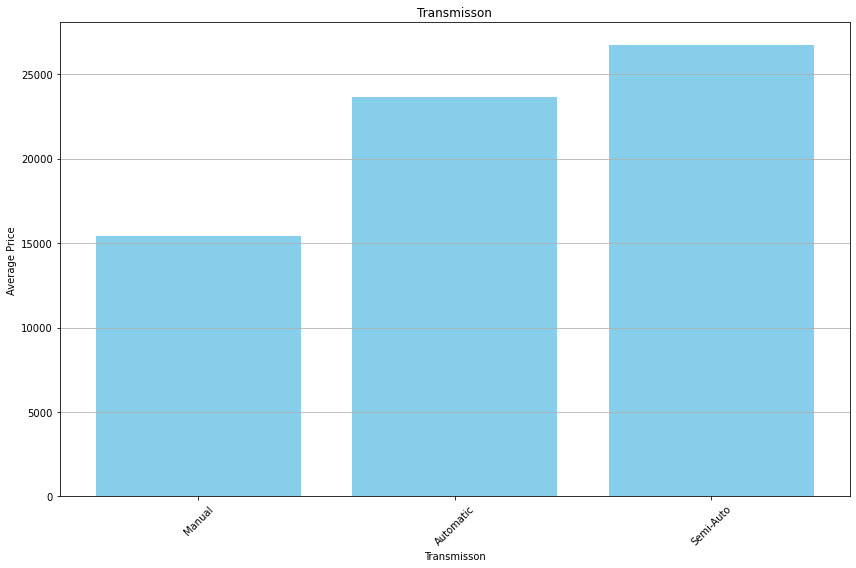

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
average_price_per_model = df.groupby('transmission')['price'].mean().reset_index()

# Sort the dataframe by average price
average_price_per_model = average_price_per_model.sort_values(by='price')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(average_price_per_model['transmission'], average_price_per_model['price'], color='skyblue')
plt.xlabel('Transmisson')
plt.ylabel('Average Price')
plt.title('Transmisson')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

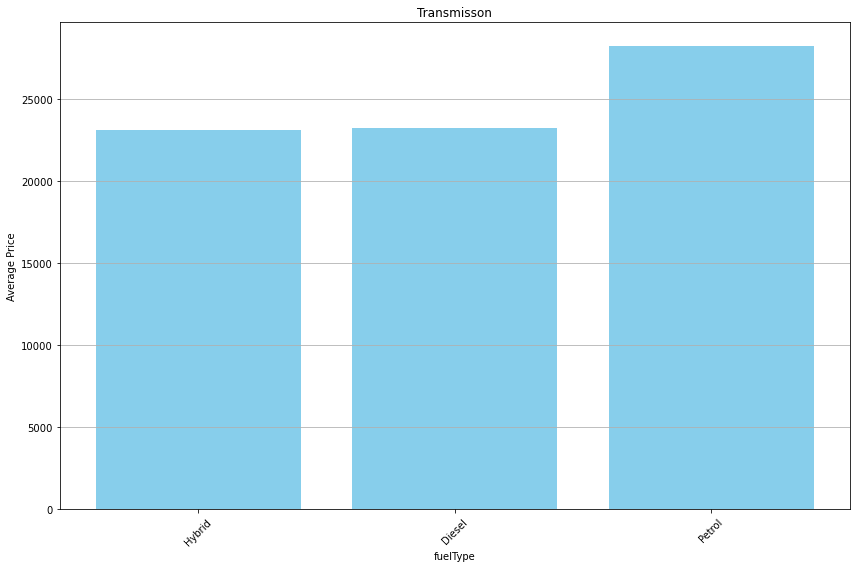

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
average_price_per_model = df.groupby('fuelType')['price'].mean().reset_index()

# Sort the dataframe by average price
average_price_per_model = average_price_per_model.sort_values(by='price')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(average_price_per_model['fuelType'], average_price_per_model['price'], color='skyblue')
plt.xlabel('fuelType')
plt.ylabel('Average Price')
plt.title('Transmisson')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()